验证集上的最小loss： 0.59028698303
[0.90000000000000002, 0.88516275026922453, 0.87090020861372697, 0.85718987353400933, 0.84401012945114506, 0.83134021172710404, 0.81916017306821498, 0.80745085125703298, 0.79619383816005074, 0.78537144996077779, 0.77496669856968292, 0.76496326416445215, 0.7553454688158312, 0.74609825115609341, 0.73720714204889803, 0.72865824122089984, 0.72043819481707239, 0.7125341738431904, 0.70493385346038073, 0.69762539309802774, 0.69059741735265368, 0.68383899764169453, 0.67733963458229007, 0.67108924106641821, 0.66507812600482719, 0.65929697871330617, 0.65373685391588876, 0.64838915734058067, 0.64324563188418382, 0.6382983443236987, 0.63353967255269084, 0.62896229332185483, 0.6245591704638388, 0.62040476471536987, 0.61641514955511023, 0.61272150698482075, 0.60951477376373353, 0.60675505040736066, 0.6043531447315913, 0.60235117776603198, 0.6005574018925669, 0.59893218536961645, 0.59762792844128954, 0.59657941696211492, 0.59568500420437864, 0.59491876460441417, 0.5942385997

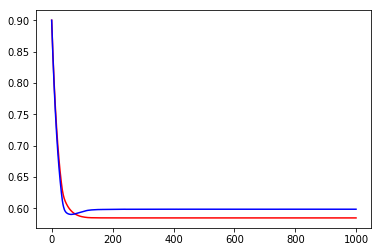

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 
x,y = load_svmlight_file("F:/australian_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones(m)
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
m_train,n_train= np.shape(X_train)
m_test,n_test= np.shape(X_test)
w = np.zeros(n+1)
W=w.transpose()
alpha = 0.02
maxIteration = 1000
Iteration=range(0,maxIteration)
Ltrain=[]
Lvalidation=[]
for i in range(0, maxIteration):
    ltrain=0
    ltest=0
    g=0
    count=0
    for j in range(m_train):
        y_predict1= np.dot(W.transpose(),X_train[j].transpose())
        y_predict11= np.dot(y_predict1,y_train[j])
        ltrain+=max(0,1-y_predict11)
    lltrain=np.dot(W.transpose(),W)/2+(0.9*ltrain)/m_train
    Ltrain.append(lltrain)
    for j in range(m_test):
        y_pre=np.dot(W.transpose(),X_test[j].transpose())
        if y_pre>=0 and y_test[j]>=0:
            count+=1
        if y_pre<0 and y_test[j]<0:
            count+=1
        y_predict2=np.dot(W.transpose(),X_test[j].transpose())
        y_predict22= np.dot(y_predict2,y_test[j])
        ltest+=max(0,1-y_predict22)
    accurancy=count/m_test
    lltest=np.dot(W.transpose(),W)/2+(0.9*ltest)/m_test
    Lvalidation.append(lltest)
    for j in range(m_train):
        y_predict111=np.dot(W.transpose(),X_train[j].transpose())
        if np.dot(y_train[j],y_predict111)<=1:
            g -= y_train[j]*X_train[j]
    gradient=W+(0.9*g)/m_train;
    W = W - alpha * gradient
plt.plot(Iteration,Ltrain,'r',label='Ltrain') 
plt.plot(Iteration, Lvalidation,'b',label=' Lvalidation') 
print("验证集上的最小loss：",min(Lvalidation))
print(Lvalidation)
print("最后一次迭代验证集上的准确率：",accurancy)
plt.show()